#### Template for the standard post analysis

Data presented here, as new inputs for this jupyter-notebook, comes from the written-shell pipeline created to extract X-ray excited-state features from some specific pair of atoms group (e.g. pair amino acid). Outputs here are filtered features that account for specific transitions (coreMO -> virtualMO) for the specific pair of atoms group

##### Check out the paper of this work <br>
#### *X-ray absorption spectroscopy reveals charge transfer in π-stacked aromatic amino acids*:<br> https://doi.org/10.1039/D4CP04615C

In [1]:
import numpy as np
import pandas as pd
import csv as csv

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

____________________________

In [5]:
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 18

--------------

#### General case of the post analysis for a list of molecules

The required data are the standard csv files obtained from the https://github.com/caraortizmah/x-ray_scripting_out pipeline which encodes the required information for the calculation of the electronic transition density atomic contribution matrix.

Data in .csv format
##### residue called as A is that one expressed in the core space
> ##### resA core MO
##### residue called as B is that one expressed in the virtual space
> ##### resB virtual MO

In a pair-aa interaction, e.g. Phe-Tyr, Phenylalanine stands for resA core MO and Tyrosine for resB virtual MO

#### Before starting, create a list file (for the csv files) with two columns (hash, file) listing all the csv files by property/component.
For instance the case of *resA core MO*:


Create a file named `resA_MOcore_list.log` where the first column is a list with a hash, e.g., f01, f02, ...f99 and
the second is the name of the csv file to explore (in this case only the resA MO core csv files).

The file should look like:
>  f00,(path)../newFY_1-26/resA_MOcore_AB_2.5A_1-26.csv <br>
>  f01,(path)../newFY_1-26/resA_MOcore_AB_2.6A_1-26.csv <br>
>  f02,(path)../newFY_1-26/resA_MOcore_AB_2.7A_1-26.csv <br>
>  f03,(path)../newFY_1-26/resA_MOcore_AB_2.8A_1-26.csv <br>
>  ... <br>
>  f61,(path)../newFY_1-26/resA_MOcore_AB_11.0A_1-26.csv <br>

#### Repeat the previous procedure (hashing and listing csv files) for each property/component

> ##### resA core MO - Phenylalanine

In [6]:
# Open the file: resA_MOcore_list.log
resa_mocore_raw = {}
with open('resA_MOcore_list.log', 'r') as file:
    # Read each line in the file
    for line in file:
        # Print each line
        line = line.strip()
        #hash = line.split(',')[0]
        #file_n = line.split(',')[1]
        resa_mocore_raw.update({line.split(',')[0]: pd.read_csv(line.split(',')[1], 
                                                          delimiter=',', index_col='num-1')})
#resa_mocore_raw['f02']

> ##### resB virt MO - Tyrosine

In [7]:
# Open the file: resB_MOvirt_list.log
resb_movirt_raw = {}
with open('resB_MOvirt_list.log', 'r') as file:
    # Read each line in the file
    for line in file:
        # Print each line
        line = line.strip()
        #hash = line.split(',')[0]
        #file_n = line.split(',')[1]
        resb_movirt_raw.update({line.split(',')[0]: pd.read_csv(line.split(',')[1], 
                                                          delimiter=',', index_col='num-1')})
#resb_movirt_raw['f02']

<html>
<body>
<h2 id="title">Features from  X-ray excited-state properties: </h2>
<h3 id="title">1. The number of transitions </h3>
<h3 id="title">2. The transitions averaged probability (neglected so far)</h3>
<h3 id="title">3. The oscillator strength using electronic dipole moment as operator (used al the time)</h3>
<h3 id="title">4. The oscillator strength using velocity dipole moment as operator (heglected so far)</h3>
</body>
</html>

##### coreMO vs. virtual MO (core/virt MO)
##### example resA(Phe) --> resB(Tyr)

> ### 1. core/virt MO as function of the number of transitions

#### Repeat the hashing and listing csv files procedure (as done above) for each property/component

In [8]:
# Open the file: corevirtMO_list.log
corevirtMO_raw = {}
with open('corevirtMO_list.log', 'r') as file:
    # Read each line in the file
    for line in file:
        # Print each line
        line = line.strip()
        #hash = line.split(',')[0]
        #file_n = line.split(',')[1]
        corevirtMO_raw.update({line.split(',')[0]: pd.read_csv(line.split(',')[1], 
                                                          delimiter=',', index_col='virt\core')})
#corevirtMO_raw['f02']

> ### 2. core/virt MO as function of the number of transitions averaged probability

#### Repeat the hashing and listing csv files procedure for each property/component

In [9]:
# Open the file: corevirtMO_tspb_list.log
corevirtMO_tspb_raw = {}
with open('corevirtMO_tspb_list.log', 'r') as file:
    # Read each line in the file
    for line in file:
        # Print each line
        line = line.strip()
        #hash = line.split(',')[0]
        #file_n = line.split(',')[1]
        corevirtMO_tspb_raw.update({line.split(',')[0]: pd.read_csv(line.split(',')[1], 
                                                          delimiter=',', index_col='virt\core')})
#corevirtMO_tspb_raw['f02']

> ### 3. core/virt MO as function of the oscillator strength using electronic dipole moment as operator
> #### by weighted (WSM): fosce, sum and weighted average (WAM): foscwe

#### Repeat the hashing and listing csv files procedure for each property/component

In [10]:
# Open the file: corevirt_fosce_AB_list.log
corevirtMO_fosce_raw = {}
with open('corevirt_fosce_AB_list.log', 'r') as file:
    # Read each line in the file
    for line in file:
        # Print each line
        line = line.strip()
        #hash = line.split(',')[0]
        #file_n = line.split(',')[1]
        corevirtMO_fosce_raw.update({line.split(',')[0]: pd.read_csv(line.split(',')[1], 
                                                          delimiter=',', index_col='virt\core')})
#corevirtMO_fosce_raw['f02']

#### Repeat the hashing and listing csv files procedure for each property/component

In [11]:
# Open the file: corevirt_fosce_AB_list.log
corevirtMO_foscwe_raw = {}
with open('corevirt_foscwe_AB_list.log', 'r') as file:
    # Read each line in the file
    for line in file:
        # Print each line
        line = line.strip()
        #hash = line.split(',')[0]
        #file_n = line.split(',')[1]
        corevirtMO_foscwe_raw.update({line.split(',')[0]: pd.read_csv(line.split(',')[1], 
                                                          delimiter=',', index_col='virt\core')})
#corevirtMO_foscwe_raw['f02']

> ### 4. core/virt MO as function of the oscillator strength using velocity dipole moment as operator
> #### by weighted (WSM) sum and weighted average (WAM)
This option is commented because is no longer used, however if the user wnats to explore other property/components just call them following the above-shown procedure

In [12]:
#resab_foscv_fy="corevirt_foscv_FY_"#same as YF
#resab_foscwv_fy="corevirt_foscwv_FY_"
#post=".csv"
#for ii in list_suf:
#    globals()['corevirt_mo_foscv_%s_FY_raw' % str(ii)] = pd.read_csv(resab_foscv_fy+str(ii)+post, delimiter=',', index_col='virt\core')
#    globals()['corevirt_mo_foscwv_%s_FY_raw' % str(ii)] = pd.read_csv(resab_foscwv_fy+str(ii)+post, delimiter=',', index_col='virt\core')

#corevirt_mo_foscv_27_FY_raw.head()

### Main functions to present data according to the features

In [13]:
def selecting_atm_matrix(df, atoms_list):
    """
    it returns MO matrix (df) having just the atoms in atoms_list.
    """
    col_list = df.index.tolist() #listing index (elements from column 0)
    #dff = df.loc[:, (df != 0).any(axis=0)] #removing zero columns
    return df.loc[[i for i in atoms_list if i in col_list]] #returning just columns in the both lists intersection
#atoms_core=resa_mocore_GFG9Y_raw.index.tolist() #all C-core atoms
#[i for i in atoms_a if i in atoms_core] #atoms_a intersection atoms_core

In [14]:
def nonzero_mo_matrix(df):
    """
    it returns MO matrix (df) having just non-zero MO population.
    """
    return df.loc[:, (df != 0).any(axis=0)] #removing zero columns

In [15]:
def crop_by_loewdin_p(df,pop):
    """
    it returns MO matrix (df) having just a Loewdin MO population contribution greater than (100*pop)%.
    pop is a number between 0 and 1.
    """
    #cols = [col for col, val in df.sum()[2:].iteritems() if val > (pop*100)]
    cols = [col for col, val in df.sum()[2:].items() if val > (pop*100)]
    #iteritem() create a zip with the index_col and the values
    cols.insert(0,'lvl')
    cols.insert(0,'sym')
    #to add on the top the first two columns removed in the previous sum() evaluation
    return df[cols] #showing the fisrt two columns and those having population greater than pop*100%

In [16]:
def cropping_matrix(df, df1, df2):
    """
    it returns a cropped MO matrix from df using as parameters the indices in df1 and df2.
    df1 index are column names from df and df2 index are the rows from df
    """
    try:
        dff = df[df1.axes[1][2:].tolist()] #saving specific columns
    except KeyError:
        tmp_mo = [item for item in df1.axes[1][2:].tolist() if item in df.axes[1][0:].tolist()]
        #removing items in the first list that are not in the second one
        dff = df[tmp_mo]
    try:
        return dff.loc[[int(i) for i in df2.axes[1][2:].tolist()]] #returning specific rows
    except KeyError:
        tmp_mo2 = [item for item in df2.axes[1][2:].tolist() if int(item) in dff.T.axes[1][0:].tolist()]
        # dff.T to obtain the index_col as the head row
        return dff.loc[[int(i) for i in tmp_mo2]] #returning specific rows
# the first two elements in df2.axes[1] and df1.axes[1] are "sym" and "lvl", that's why I used df.axes[1][2:]

<html>


<body>
<h3 id="title">Reducing Löwdin Population MO matrices by removing non-contributing MO</h3>
<h4> Case for core MO in the resA</h4>
</body>
</html>

In [17]:
# Loop through keys and values resa_mocore_raw
resa_mocore = {}
for key, value in resa_mocore_raw.items():
    resa_mocore.update({key: nonzero_mo_matrix(value)})
#resa_mocore['f02']

<html>

<body>
<h4> Case for virtual MO in the resB</h4>
</body>
</html>
<html>

In [18]:
# Loop through keys and values resb_movirt_raw
resb_movirt = {}
for key, value in resb_movirt_raw.items():
    resb_movirt.update({key: nonzero_mo_matrix(value)})
#resb_movirt['f02']

___________________________

<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h3 id="title">Results</h3>
<h4 id="title">Features presentation</h4>
</body>
</html>

<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h4 id="title">Pair-aa distance in Å</h4>
</body>
</html>

______________________________

##### Fast visual inspection applying Weithed Averaged Sum transforming each matrix into a scalar

In [25]:
# Set distances
l_tmp = [85, 90, 95, 100, 105, 110]
list_suf = [i for i in range(25,81)]
for i in l_tmp:
    list_suf.append(i)

<Axes: xlabel='Distance'>

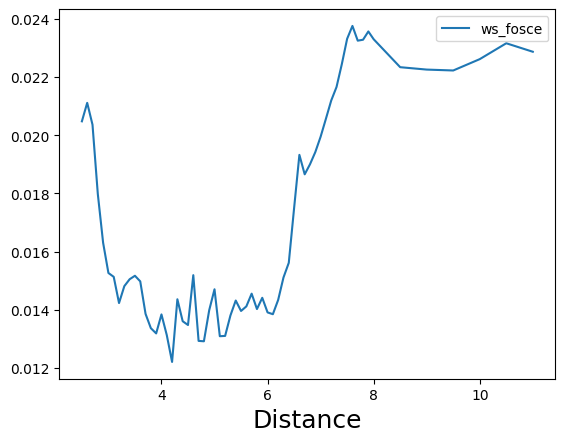

In [26]:
# Fast visual inspection of all samples, this case is well known that the variable to follow is the distance separation from axis-Z
tmp_f = []
for key, value in corevirtMO_fosce_raw.items():
    tmp = (value*value).sum()/value.sum()
    tmp = ((tmp*tmp).sum())/tmp.sum()
    tmp_f.append(tmp)
    
test_weighted_fosce = pd.DataFrame({'Distance': [ii/10 for ii in list_suf],\
                               'ws_fosce': [i for i in tmp_f]
                              })
test_weighted_fosce.plot(x='Distance', y='ws_fosce', style='-')
#weighted_fosce

### BGA product

In [27]:
def ts_psb_acore_bvirt(acore, bvirt, abcorevirt, atm_to_virtmo=False):
    """
    Do a matrix multiplication between the core-to-virt transition 
    probabilities matrix and the core MO matrix, then the resulting matrix
    is multiplied by the virtual MO matrix.
    if atm_to_virtmo is True, then the two resulting matrices in the 
    multiplication process are returned.
    By the default, just the last matrix is returned.
    """
    abcorevirt.index = abcorevirt.index.astype('str') 
    #to make possible the dot product in pandas, the indexes involved in each
    #product have to "match" in name and type
    
    i = j = 0
    dff = pd.DataFrame(np.zeros((acore.shape[0], abcorevirt.shape[0])), \
                       index=acore.index, columns=abcorevirt.index)
    for j in range(abcorevirt.shape[1]):
        for i in range(acore.shape[1]):
            try:
                dff += acore.T[i:i+1].T.dot(abcorevirt.iloc[:].T[j:j+1])
            except:
                pass
            
    dff = dff/100
    i = j = 0
    dff2 = pd.DataFrame(np.zeros((dff.shape[0], bvirt.shape[0])), \
                        index=dff.index, columns=bvirt.index)
    for i in range(dff.shape[1]):
        for j in range(bvirt.shape[1]):
            try:
                dff2 += dff.T[i:i+1].T.dot(bvirt.T[j:j+1])
            except:
                pass
    
    if atm_to_virtmo:
        return dff, dff2
    else:
        return dff2

_________________________________________________

#### Building heatmaps

In [28]:
# WSM case
# Exploiting the fact that all data share same order of the keys (hashes)
heatmap_raw = {}
for key in resb_movirt_raw.keys(): # it can be any of the created disctionaries, they have same keys and in the same order
    heatmap_raw.update({
        key:
        ts_psb_acore_bvirt(
            resa_mocore[key].T[2:].T,
            resb_movirt_raw[key].T[2:].T,
            corevirtMO_fosce_raw[key])
    })

### WAM case is no longer used, it is presented but all the work was performed using the WSM case.
### However is important to highlight that WAM and WSM act as representations, so it is the domain-knowledge of the user who decides.

In [29]:
# WAM case
# Exploiting the fact that all data share same order of the keys (hashes)
heatmapw_raw = {}
for key in resb_movirt_raw.keys(): # it can be any of the created disctionaries, they have same keys and in the same order
    heatmapw_raw.update({
        key:
        ts_psb_acore_bvirt(
            resa_mocore[key].T[2:].T,
            resb_movirt_raw[key].T[2:].T,
            corevirtMO_foscwe_raw[key])
    })

In [30]:
def sum_Mm(dfbig, dfsmall):
    """
    in a dfbig matrix, the elements from dfsmall matrix are summed according
    to its index and columns matches in dfbig index and columns
    values
    """
    for i in dfsmall.index.values:
        for j in dfsmall.columns.values:
            try:
                dfbig.loc[[i],[j]] += dfsmall.loc[[i],[j]]
            except:
                pass
    return dfbig

In [31]:
for key in heatmap_raw.keys():
    heatmap_raw[key].index.names = ['core-atom']
    heatmap_raw[key].columns.names = ['virtual-atom']

In [32]:
heatmap = {}
for key in heatmap_raw.keys():
    heatmap.update({
        key:
        heatmap_raw[key].apply(pd.to_numeric).sort_index(ascending=True)
    })

In [33]:
## test purposes
rel_list = []
tmp_keys = [key for key in heatmap.keys()][10:58] #from 3.5 to 9.0 A
for ii in tmp_keys: 
    rel_list.append(heatmap[ii].max().max())
relmax = max(rel_list)
relmin = min(rel_list)
relmin, relmax

(0.5440394435611963, 1.1369871456805003)

## Plot electron transition density atomic contribution matrices

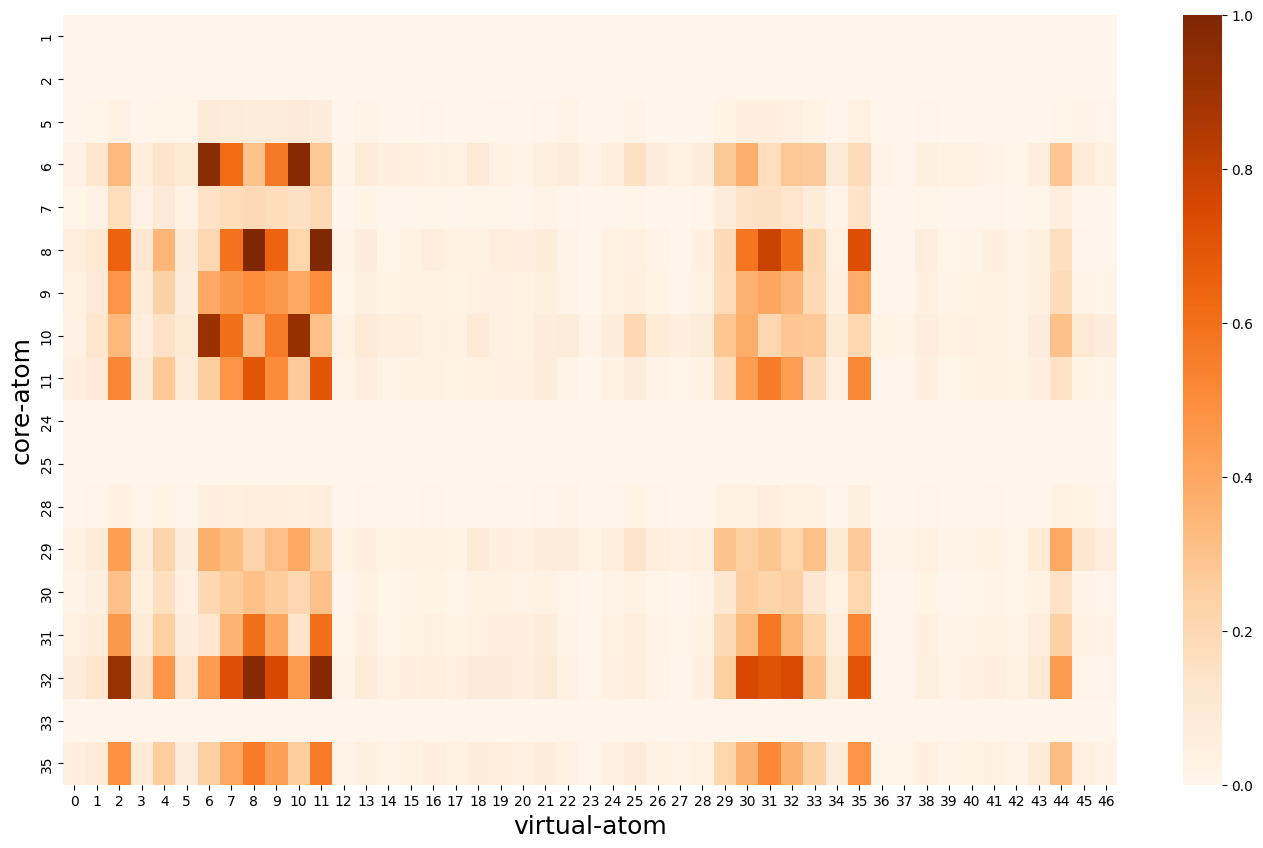

In [34]:
fig, ax = plt.subplots(figsize=(17,10)) 

test = (heatmap['f13'] - heatmap['f13'].min().min())/(heatmap['f13'].max().max() - heatmap['f13'].min().min())

sns.heatmap(test, annot=False, cmap='Oranges', vmin=0, vmax=1, ax=ax)
fig.savefig('FGL_FY_38.svg', format="svg")

<Axes: xlabel='virtual-atom', ylabel='core-atom'>

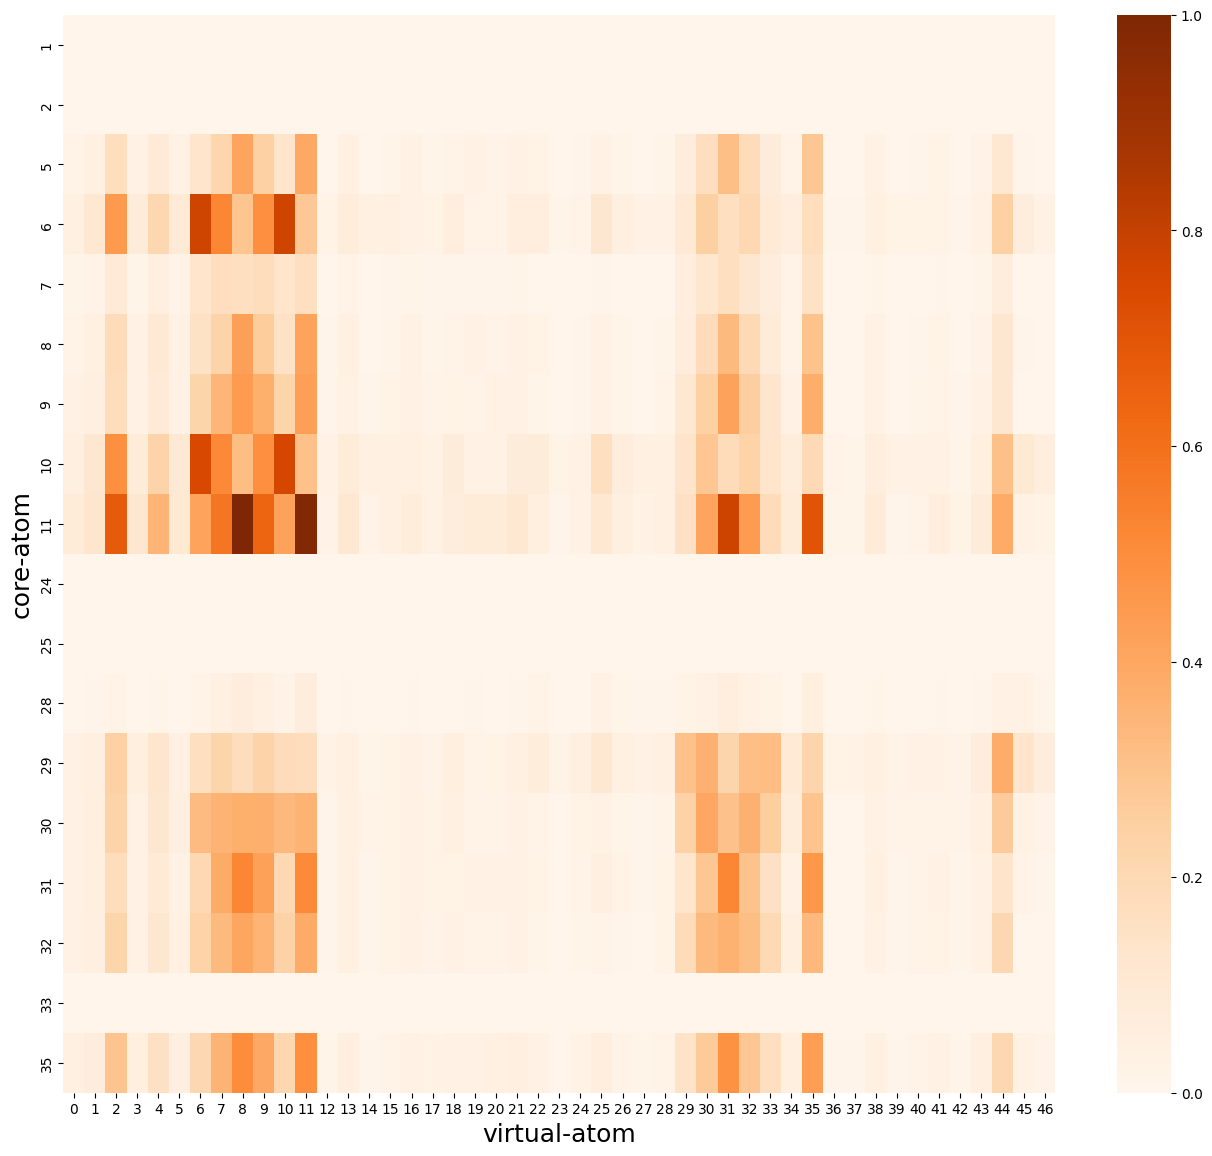

In [35]:
fig, ax = plt.subplots(figsize=(16,14)) 

test = (heatmap['f17'] - heatmap['f17'].min().min())/(heatmap['f17'].max().max() - heatmap['f17'].min().min())
sns.heatmap(test, annot=False, cmap='Oranges', vmin=0, vmax=1, ax=ax)

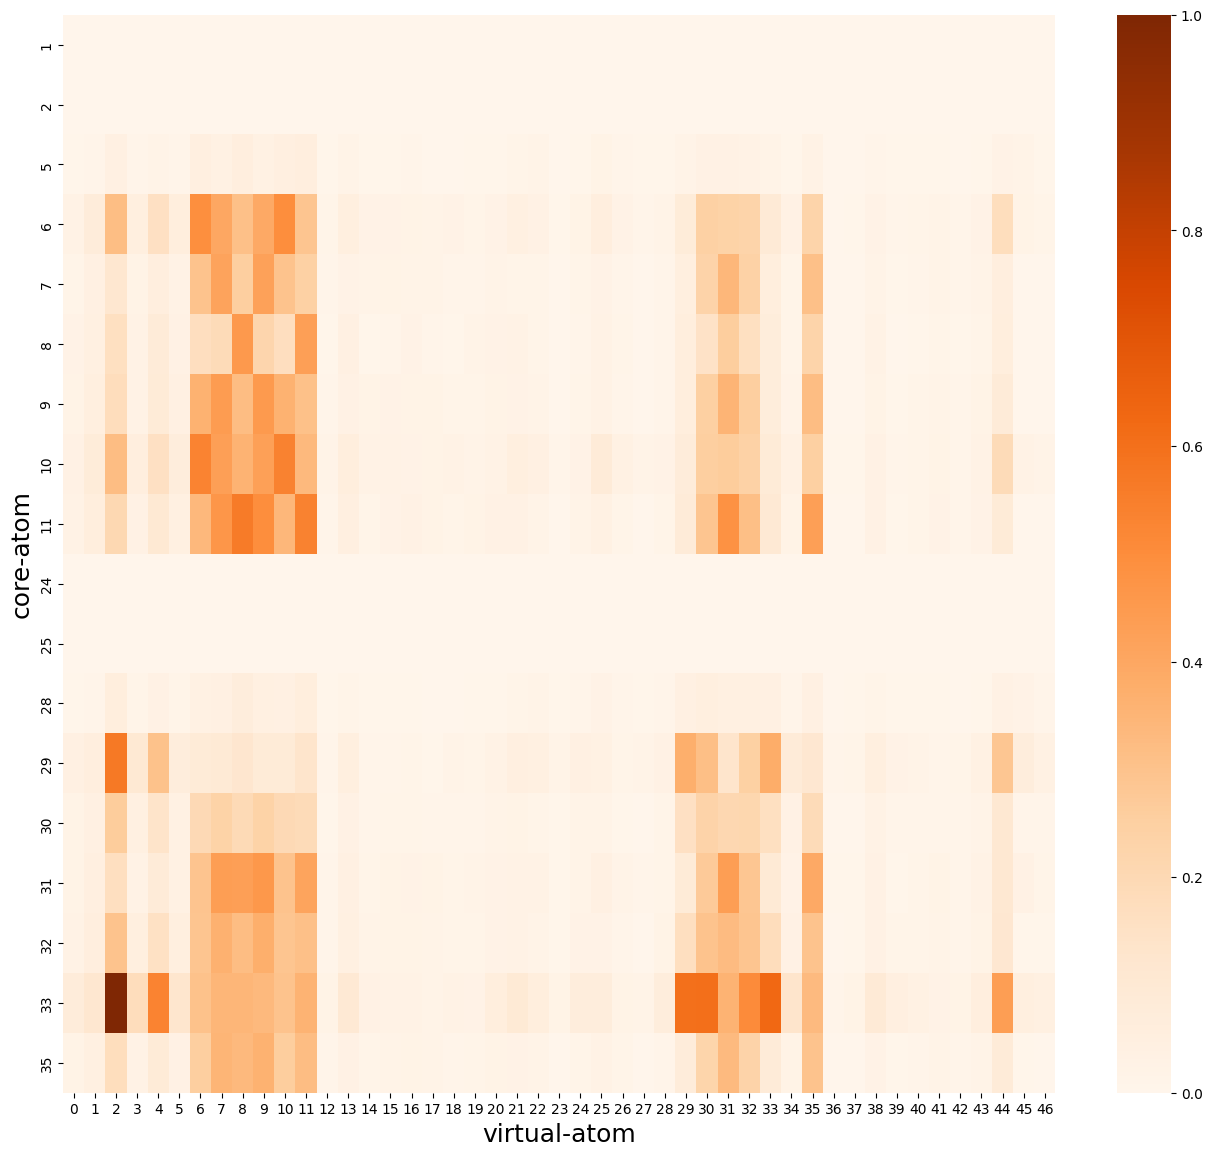

In [36]:
fig, ax = plt.subplots(figsize=(16,14)) 

test = (heatmap['f23'] - heatmap['f23'].min().min())/(heatmap['f23'].max().max() - heatmap['f23'].min().min())
sns.heatmap(test, annot=False, cmap='Oranges', vmin=0, vmax=1, ax=ax)
fig.savefig('FGL_FY_48.svg', format="svg")

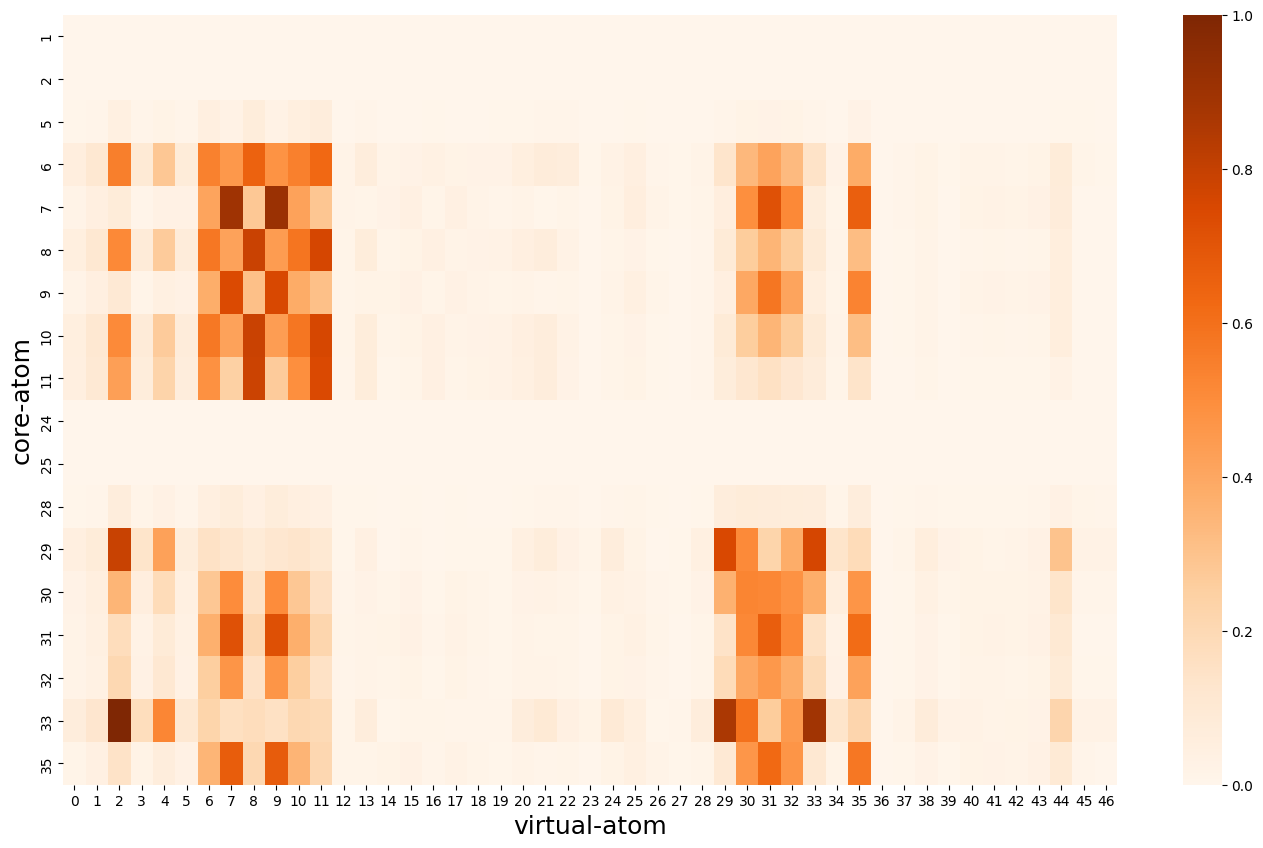

In [37]:
fig, ax = plt.subplots(figsize=(17,10)) 

test = (heatmap['f35'] - heatmap['f35'].min().min())/(heatmap['f35'].max().max() - heatmap['f35'].min().min())
sns.heatmap(test, annot=False, cmap='Oranges', vmin=0, vmax=1, ax=ax)
fig.savefig('FGL_FY_60.svg', format="svg")

<Axes: xlabel='virtual-atom', ylabel='core-atom'>

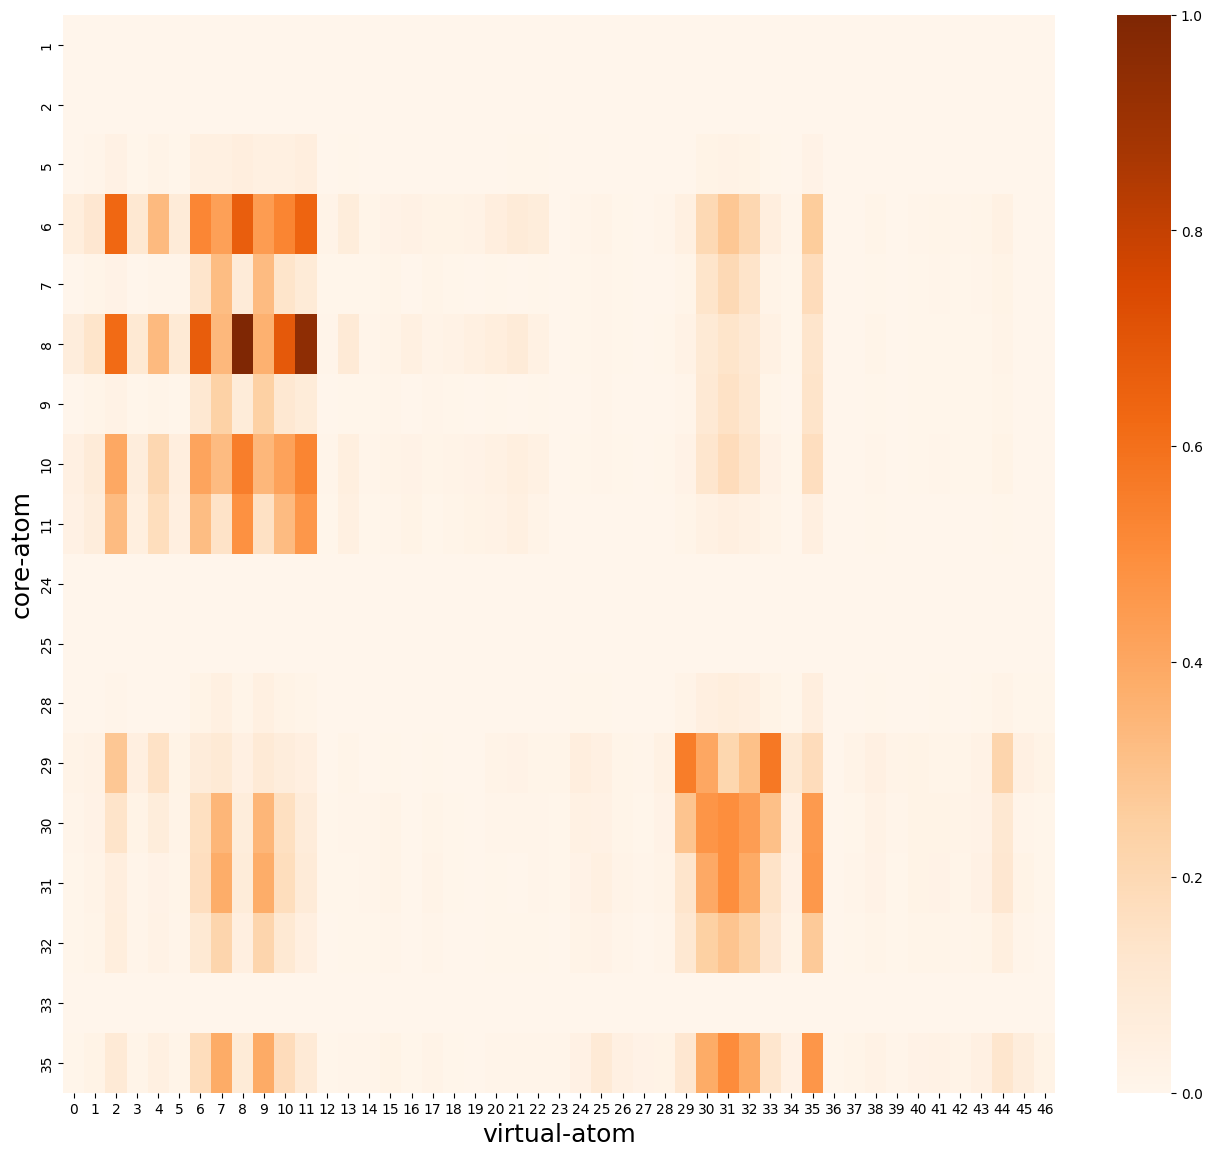

In [38]:
fig, ax = plt.subplots(figsize=(16,14)) 

test = (heatmap['f40'] - heatmap['f40'].min().min())/(heatmap['f40'].max().max() - heatmap['f40'].min().min())
sns.heatmap(test, annot=False, cmap='Oranges', vmin=0, vmax=1, ax=ax)

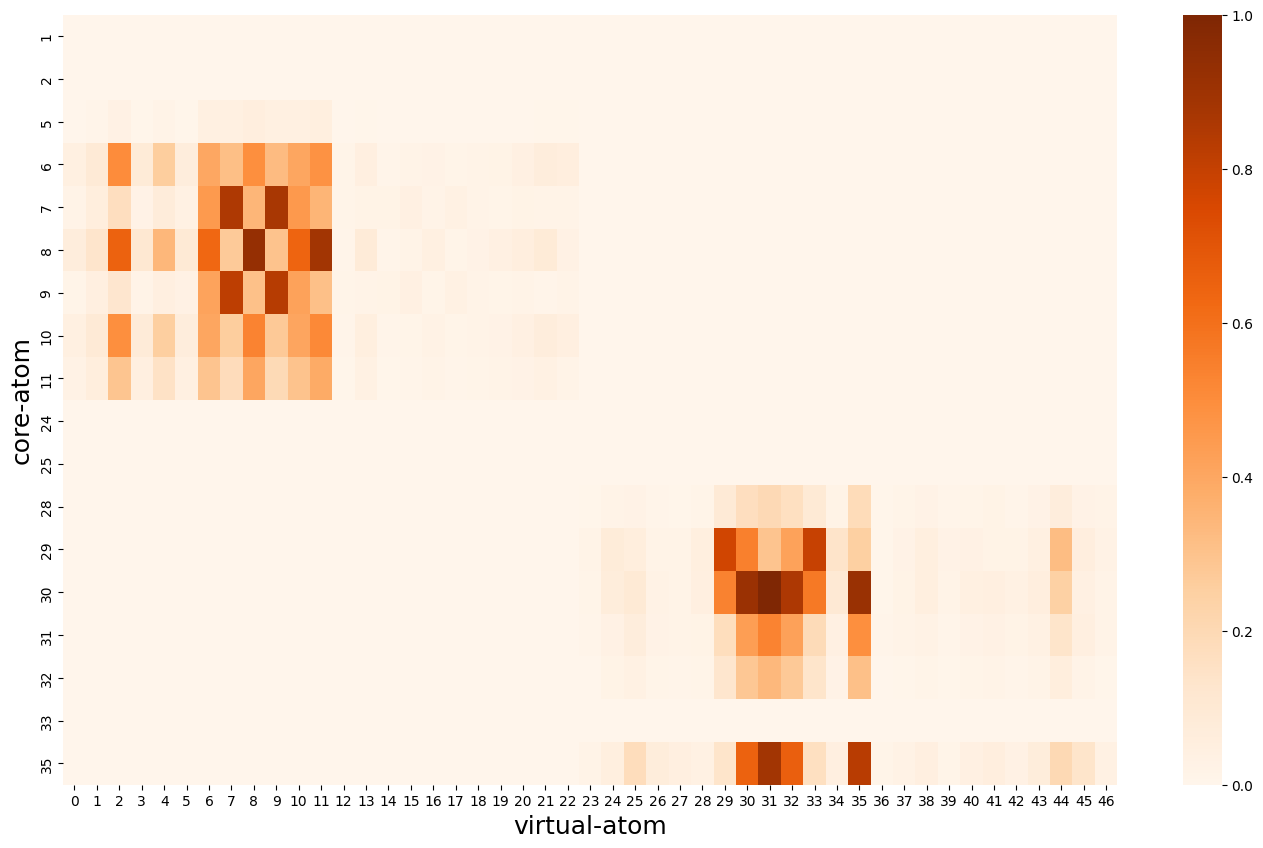

In [39]:
fig, ax = plt.subplots(figsize=(17,10)) 

test = (heatmap['f55'] - heatmap['f55'].min().min())/(heatmap['f55'].max().max() - heatmap['f55'].min().min())
sns.heatmap(test, annot=False, cmap='Oranges', vmin=0, vmax=1, ax=ax)
fig.savefig('FGL_FY_80.svg', format="svg")

<Axes: xlabel='virtual-atom', ylabel='core-atom'>

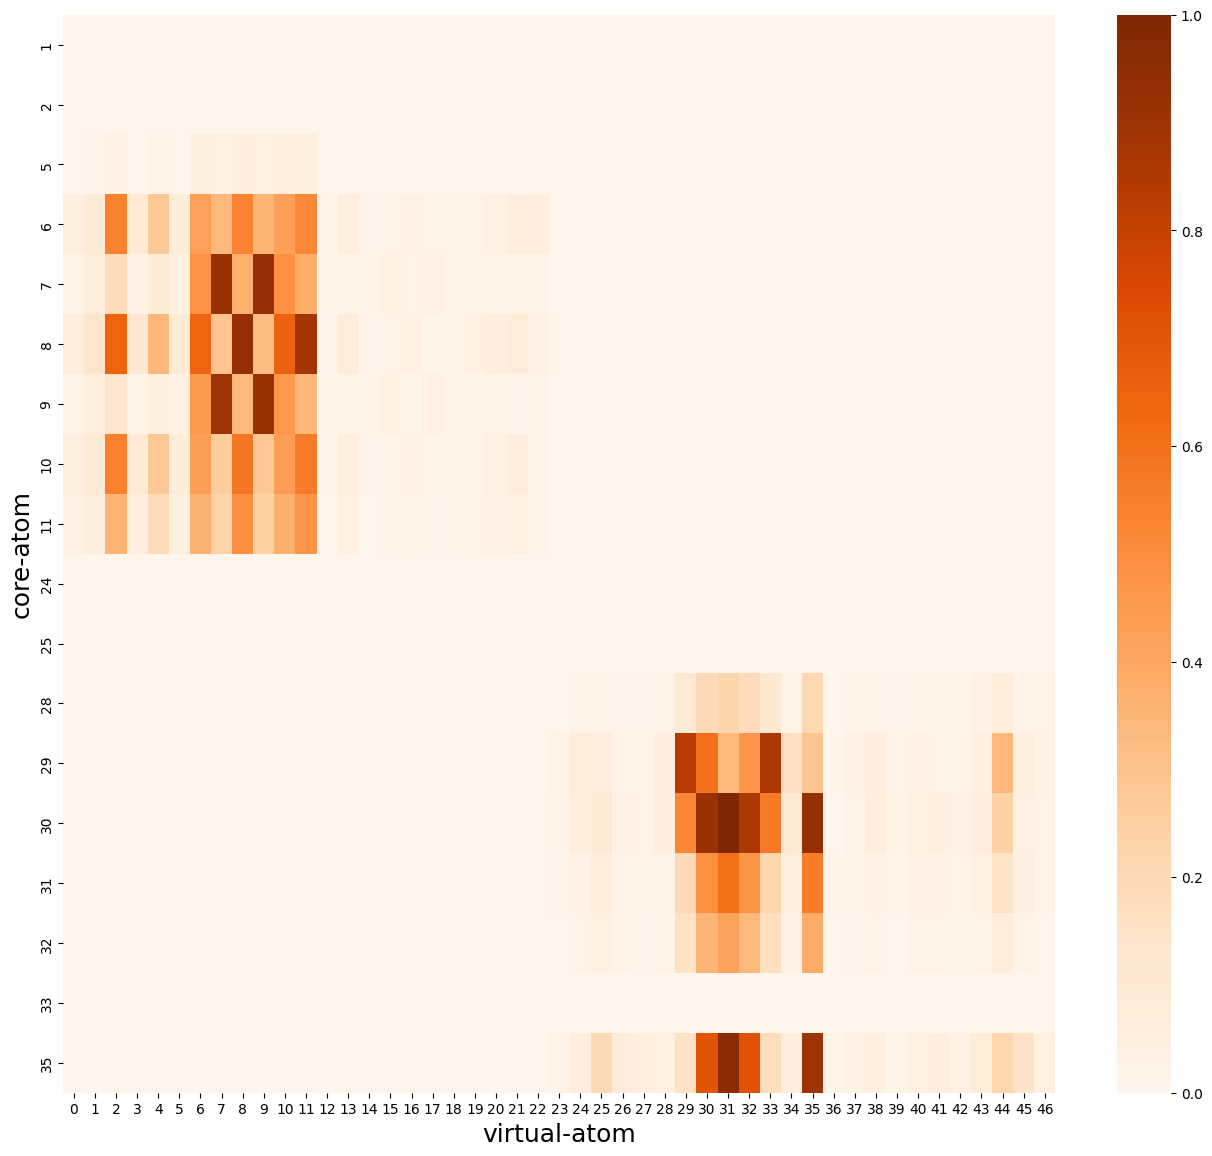

In [40]:
fig, ax = plt.subplots(figsize=(16,14)) 

test = (heatmap['f59'] - heatmap['f59'].min().min())/(heatmap['f59'].max().max() - heatmap['f59'].min().min())
sns.heatmap(test, annot=False, cmap='Oranges', vmin=0, vmax=1, ax=ax)

## Definition of amino acids using range of atoms
#### Example is the same Phe --- Tyr

#### Set atoms

In [41]:
atomAi = 0
atomAf = 22
atomBi = 23
atomBf = 46

In [42]:
atomAi, atomAf, atomBi, atomBf

(0, 22, 23, 46)

In [43]:
heatmap['f20'].loc[[i for i in heatmap['f20'].index.values if i <= atomAf],\
               [i for i in heatmap['f20'].columns.values if i >= atomBi]]

virtual-atom,23,24,25,26,27,28,29,30,31,32,...,37,38,39,40,41,42,43,44,45,46
core-atom,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.002046,0.004004,0.014328,0.006630,0.004315,0.005286,0.013637,0.028078,0.027500,0.025182,...,0.003275,0.008265,0.003287,0.004784,0.004200,0.002791,0.006454,0.024454,0.012777,0.005326
6,0.005407,0.011608,0.050542,0.020837,0.011286,0.014545,0.046678,0.154366,0.129282,0.139025,...,0.004317,0.018807,0.008759,0.009732,0.013848,0.007065,0.018243,0.141213,0.024527,0.012930
7,0.000510,0.003074,0.008761,0.003112,0.000864,0.004039,0.025834,0.076494,0.110074,0.076550,...,0.000935,0.007828,0.002162,0.003878,0.006391,0.003563,0.005417,0.024012,0.000381,0.000548
8,0.003162,0.015534,0.053823,0.020531,0.005572,0.024519,0.105387,0.279231,0.497793,0.299611,...,0.004298,0.049903,0.003966,0.013918,0.030838,0.013964,0.031912,0.133047,0.005370,0.004540
9,0.001149,0.009486,0.028731,0.011892,0.002773,0.013704,0.080245,0.232339,0.399673,0.245490,...,0.002297,0.031441,0.003860,0.010487,0.022414,0.010776,0.020257,0.075106,0.002205,0.001773
10,0.010422,0.019316,0.077510,0.032496,0.019826,0.023642,0.068052,0.167005,0.146811,0.150185,...,0.008759,0.027800,0.013013,0.013735,0.022944,0.012674,0.028931,0.180468,0.050317,0.026432
11,0.002914,0.010025,0.041335,0.015629,0.005510,0.015277,0.050567,0.146810,0.230927,0.152502,...,0.003350,0.026627,0.003623,0.008155,0.016990,0.007721,0.019478,0.105933,0.006176,0.004273


#### Delitimation of atoms of the aromatic rings

In [44]:
atomFi = 6
atomFf = 11
atomYi = 29
atomYf = 33
atomYf2 = 35

#### Calculating the 4 (more) terms of the transition intensities

In [45]:
inter_fosce = []
all_fosce = []
AB_inter_fosce = []
BA_inter_fosce = []
AA_inter_fosce = []
BB_inter_fosce = []
FYpi_inter_fosce = []
YFpi_inter_fosce = []
aropi_inter_fosce = []

for key in heatmap.keys():
    inter_fosce.append(heatmap[key].loc[
                       [i for i in heatmap[key].index.values if i > atomAf],
                       [i for i in heatmap[key].columns.values if i < atomBi]
                       ].sum().sum() +
                       heatmap[key].loc[
                       [i for i in heatmap[key].index.values if i <= atomAf],
                       [i for i in heatmap[key].columns.values if i >= atomBi]
                       ].sum().sum())
    AB_inter_fosce.append(heatmap[key].loc[
                          [i for i in heatmap[key].index.values if i <= atomAf],
                          [i for i in heatmap[key].columns.values if i >= atomBi]
                          ].sum().sum())
    BA_inter_fosce.append(heatmap[key].loc[
                          [i for i in heatmap[key].index.values if i >= atomBi],
                          [i for i in heatmap[key].columns.values if i <= atomAf]
                          ].sum().sum())
    AA_inter_fosce.append(heatmap[key].loc[
                          [i for i in heatmap[key].index.values if i <= atomAf],
                          [i for i in heatmap[key].columns.values if i <= atomAf]
                          ].sum().sum())
    BB_inter_fosce.append(heatmap[key].loc[
                          [i for i in heatmap[key].index.values if i >= atomBi],
                          [i for i in heatmap[key].columns.values if i >= atomBi]
                          ].sum().sum())
    FYpi_inter_fosce.append(heatmap[key].loc[
                            [i for i in heatmap[key].index.values if i >= atomFi and i <= atomFf],
                            [i for i in heatmap[key].columns.values if (i >= atomYi and i <= atomYf) or i == atomYf2]
                            ].sum().sum())
    YFpi_inter_fosce.append(heatmap[key].loc[
                            [i for i in heatmap[key].index.values if (i >= atomYi and i <= atomYf) or i == atomYf2],
                            [i for i in heatmap[key].columns.values if i >= atomFi and i <= atomFf]
                            ].sum().sum())
    
    aropi_inter_fosce = [FYpi_inter_fosce[i] + YFpi_inter_fosce[i] for i in range(len(inter_fosce))]
    
    all_fosce.append(heatmap[key].sum().sum())
    
intra_fosce = [all_fosce[i] - inter_fosce[i] for i in range(len(inter_fosce))]

In [46]:
max(inter_fosce), max(intra_fosce), max(all_fosce)

(22.147341668207414, 46.152039574660364, 48.707449072901845)

#### including dipole moments u_aa, u_bb, u_ab and u_ba

In [47]:
dfftotal_fosce = pd.DataFrame({'Distance': [ii/10 for ii in list_suf],\
                               'inter_fosce': [i for i in inter_fosce],\
                               'intra_fosce': [i for i in intra_fosce],\
                               'all_fosce': [i for i in all_fosce],\
                               'inter_rel_fosce': [i/max(inter_fosce) for i in inter_fosce],\
                               'intra_rel_fosce': [i/max(intra_fosce) for i in intra_fosce],\
                               'FY_pi':[i/max(inter_fosce) for i in FYpi_inter_fosce],\
                               'YF_pi':[i/max(inter_fosce) for i in YFpi_inter_fosce],\
                               'pi_pi':[i/max(inter_fosce) for i in aropi_inter_fosce],\
                               'abs_pi_pi':[i for i in aropi_inter_fosce],\
                               'all_rel_fosce': [i/max(all_fosce) for i in all_fosce],\
                               'u_aa': [(i)**0.5 for i in AA_inter_fosce],\
                               'u_bb': [(i)**0.5 for i in BB_inter_fosce],\
                               'u_ab': [(i)**0.5 for i in AB_inter_fosce],\
                               'u_ba': [(i)**0.5 for i in BA_inter_fosce]
                              })

In [48]:
dfftotal_fosce.insert(len(dfftotal_fosce.columns), 'u_abba',\
                      ((dfftotal_fosce["u_ab"]**2+dfftotal_fosce["u_ba"]**2)**0.5).values)

In [49]:
dfftotal_fosce

,Distance,inter_fosce,intra_fosce,all_fosce,inter_rel_fosce,intra_rel_fosce,FY_pi,YF_pi,pi_pi,abs_pi_pi,all_rel_fosce,u_aa,u_bb,u_ab,u_ba,u_abba
0,2.5,15.811635,16.028700,31.840335,7.139292e-01,0.347302,0.318738,2.856156e-01,6.043538e-01,13.384830,0.653706,3.035474,2.610479,2.901975,2.718488,3.976385
1,2.6,16.097037,16.488014,32.585051,7.268158e-01,0.357254,0.329830,2.809608e-01,6.107911e-01,13.527399,0.668995,3.147913,2.564889,2.947409,2.722098,4.012111
2,2.7,16.346659,16.933081,33.279740,7.380867e-01,0.366898,0.325315,2.782393e-01,6.035543e-01,13.367123,0.683258,3.232484,2.546396,2.966053,2.747579,4.043100
3,2.8,16.115904,17.727001,33.842905,7.276676e-01,0.384100,0.392324,2.040862e-01,5.964098e-01,13.208891,0.694820,3.622702,2.145468,3.229266,2.384900,4.014462
4,2.9,17.825560,18.625099,36.450659,8.048623e-01,0.403560,0.314734,3.209828e-01,6.357171e-01,14.079444,0.748359,3.326912,2.748956,2.968876,3.001889,4.222033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,9.0,0.004151,46.036660,46.040810,1.874104e-04,0.997500,0.000000,1.216044e-04,1.216044e-04,0.002693,0.945252,4.980900,4.607309,0.000000,0.064425,0.064425
58,9.5,0.000004,46.121536,46.121541,2.005882e-07,0.999339,0.000000,1.303174e-07,1.303174e-07,0.000003,0.946909,4.983238,4.613987,0.000000,0.002108,0.002108
59,10.0,0.000002,46.140848,46.140851,1.023962e-07,0.999758,0.000000,6.659987e-08,6.659987e-08,0.000001,0.947306,4.984106,4.615142,0.000000,0.001506,0.001506
60,10.5,0.000000,46.050159,46.050159,0.000000e+00,0.997793,0.000000,0.000000e+00,0.000000e+00,0.000000,0.945444,4.990911,4.597931,0.000000,0.000000,0.000000


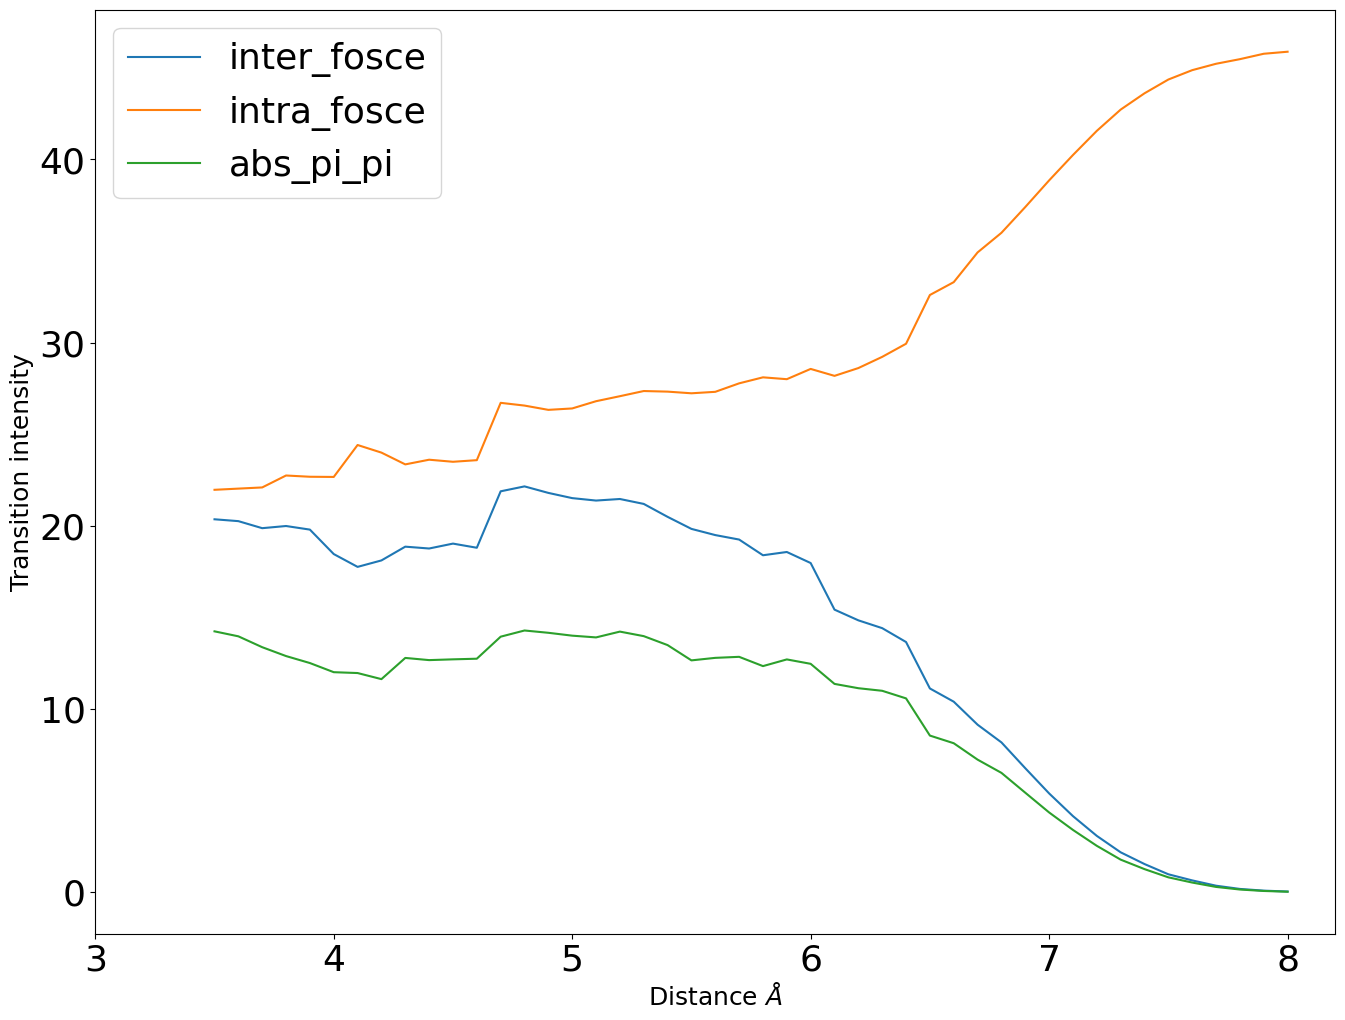

In [50]:
plt.rc('font', size=26)
ax = dfftotal_fosce.loc[10:55,:].plot(x="Distance", y=["inter_fosce","intra_fosce","abs_pi_pi"],
        kind="line", figsize=(16, 12), xlim=(3, 8.2))
ax.set_xlabel('Distance $\AA$')
ax.set_ylabel('Transition intensity')

plt.show()

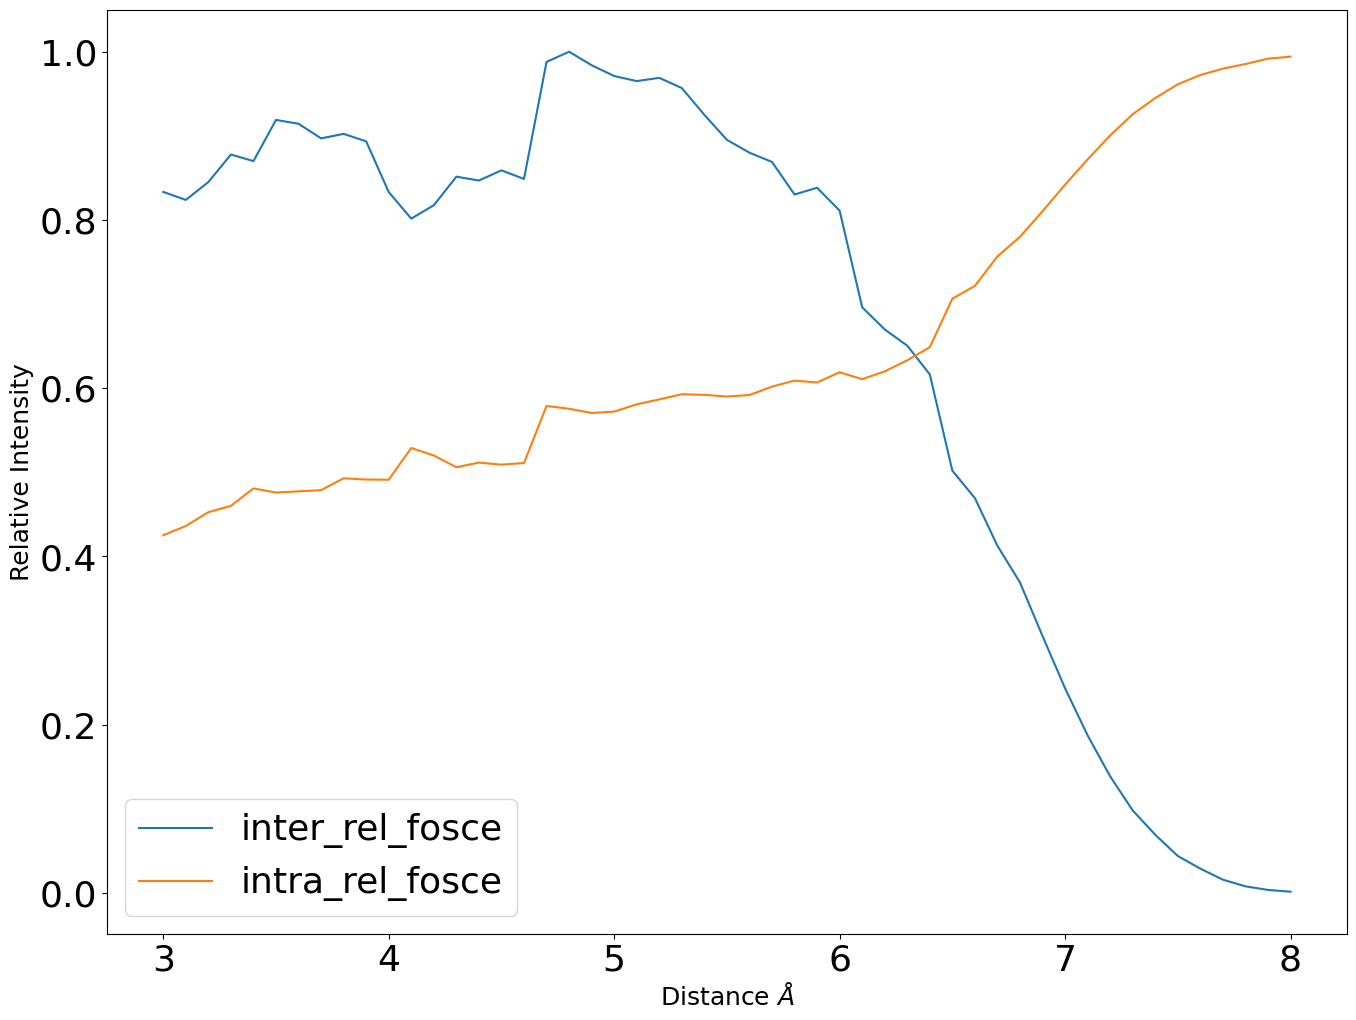

In [51]:
plt.rc('font', size=26)
ax = dfftotal_fosce.loc[5:55,:].plot(x="Distance", y=["inter_rel_fosce","intra_rel_fosce"],
        kind="line", figsize=(16, 12))
ax.set_xlabel('Distance $\AA$')
ax.set_ylabel('Relative Intensity')

plt.show()

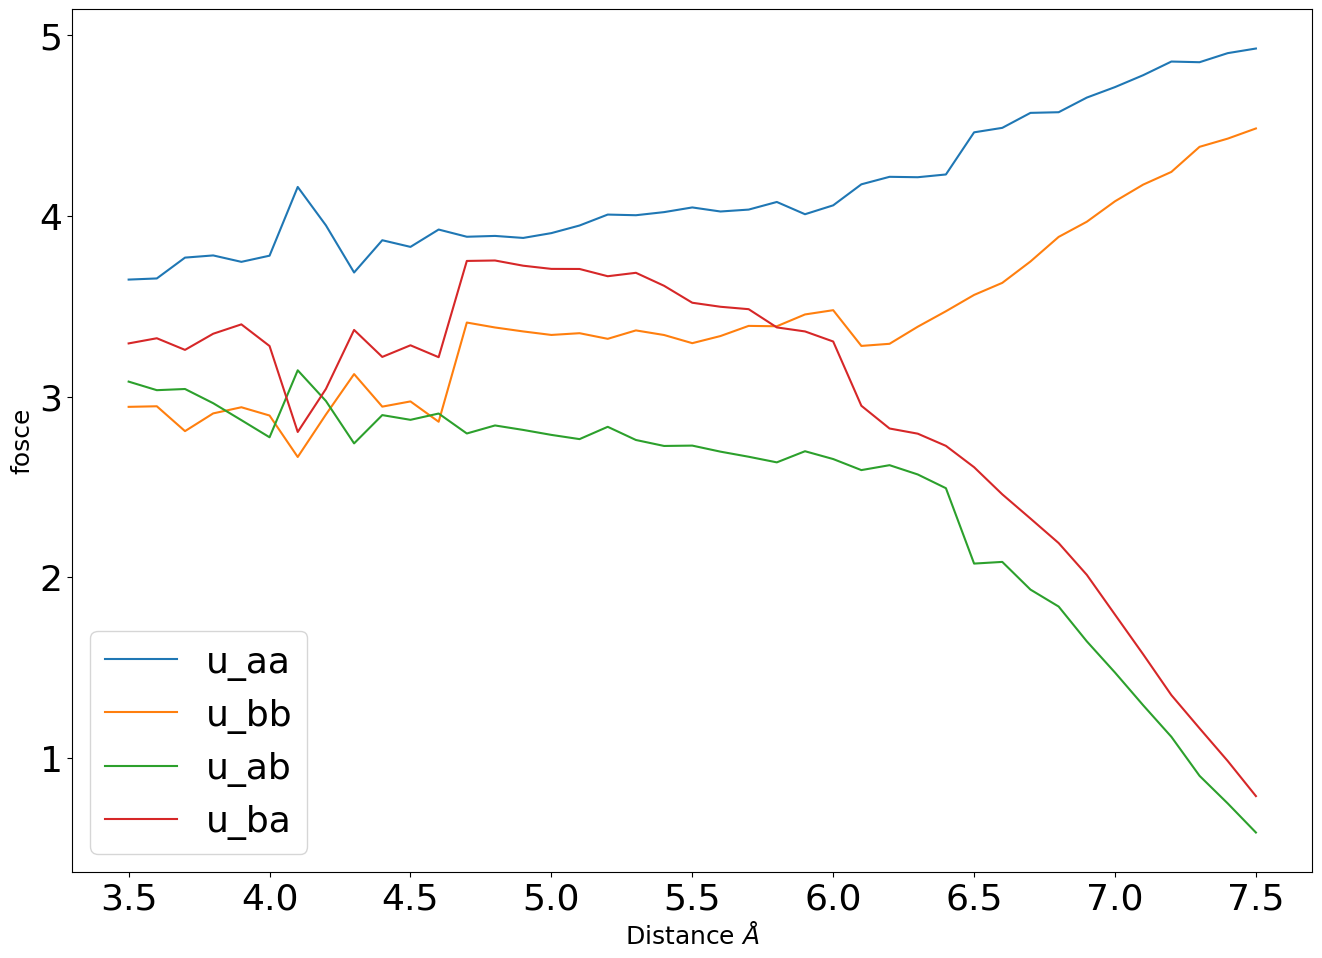

In [52]:
ax = dfftotal_fosce.loc[10:50,:].plot(x="Distance", y=["u_aa","u_bb","u_ab", "u_ba"],
        kind="line", figsize=(16, 11.2))
ax.set_xlabel('Distance $\AA$')
ax.set_ylabel('fosce')

plt.show()

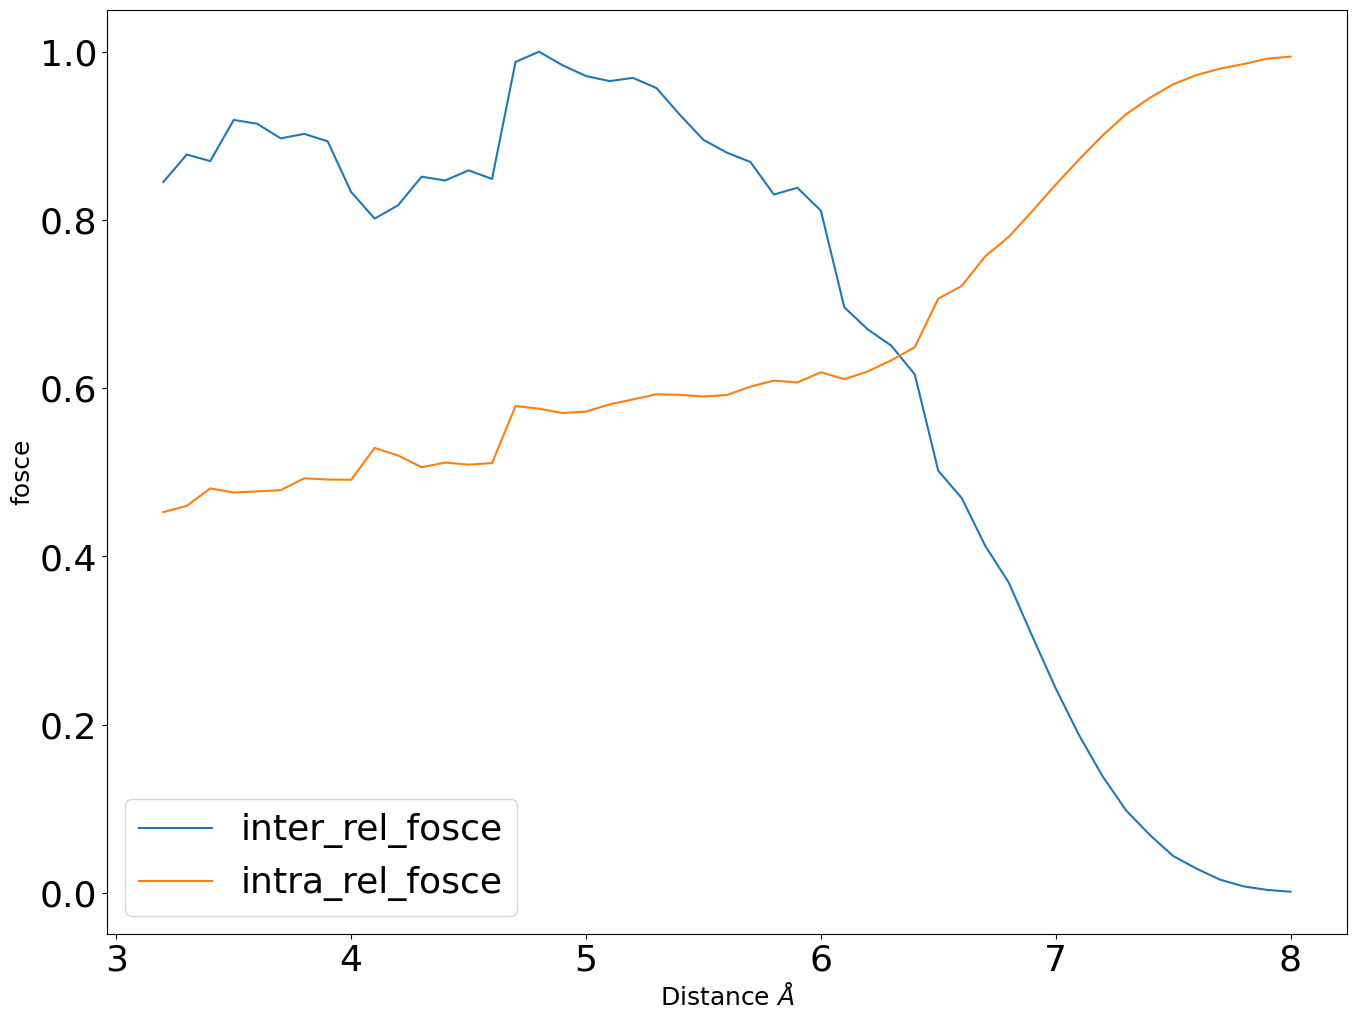

In [53]:
#intersection at 4.24-4.25 [18:20] index range
plt.rc('font', size=26)
ax = dfftotal_fosce.loc[7:55,:].plot(x="Distance", y=["inter_rel_fosce", "intra_rel_fosce"],
        kind="line", figsize=(16, 12))
ax.set_xlabel('Distance $\AA$')
ax.set_ylabel('fosce')


plt.savefig('new_intra_inter_35-80.svg', format="svg")
plt.show()

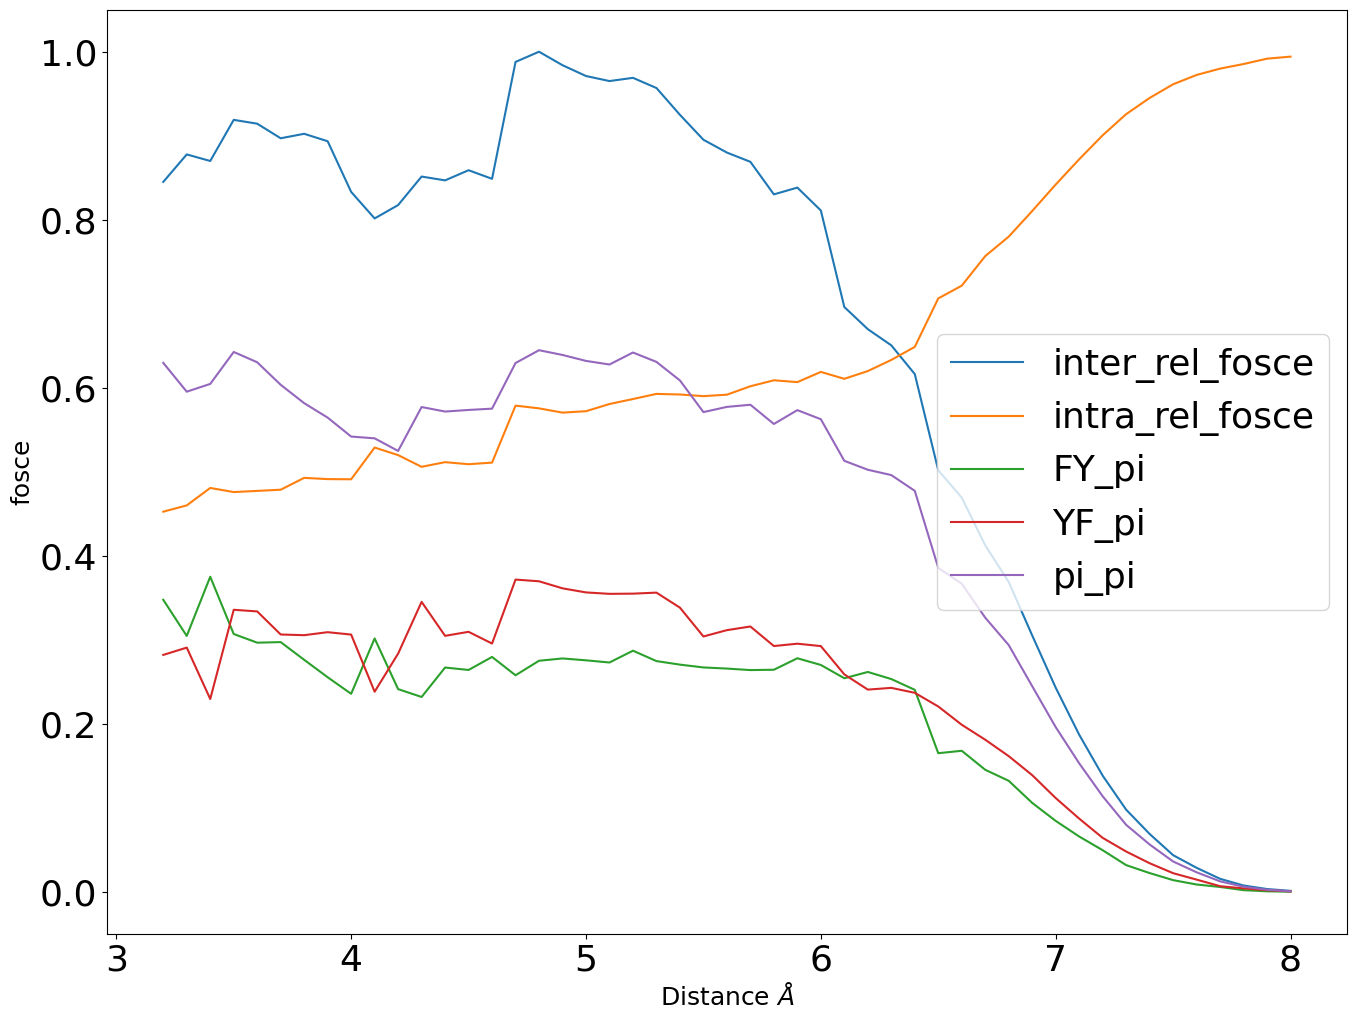

In [54]:
ax = dfftotal_fosce.loc[7:55,:].plot(x="Distance", y=["inter_rel_fosce", "intra_rel_fosce", "FY_pi", "YF_pi", "pi_pi"],
        kind="line", figsize=(16, 12))
ax.set_xlabel('Distance $\AA$')
ax.set_ylabel('fosce')
plt.rc('font', size=26)

plt.show()

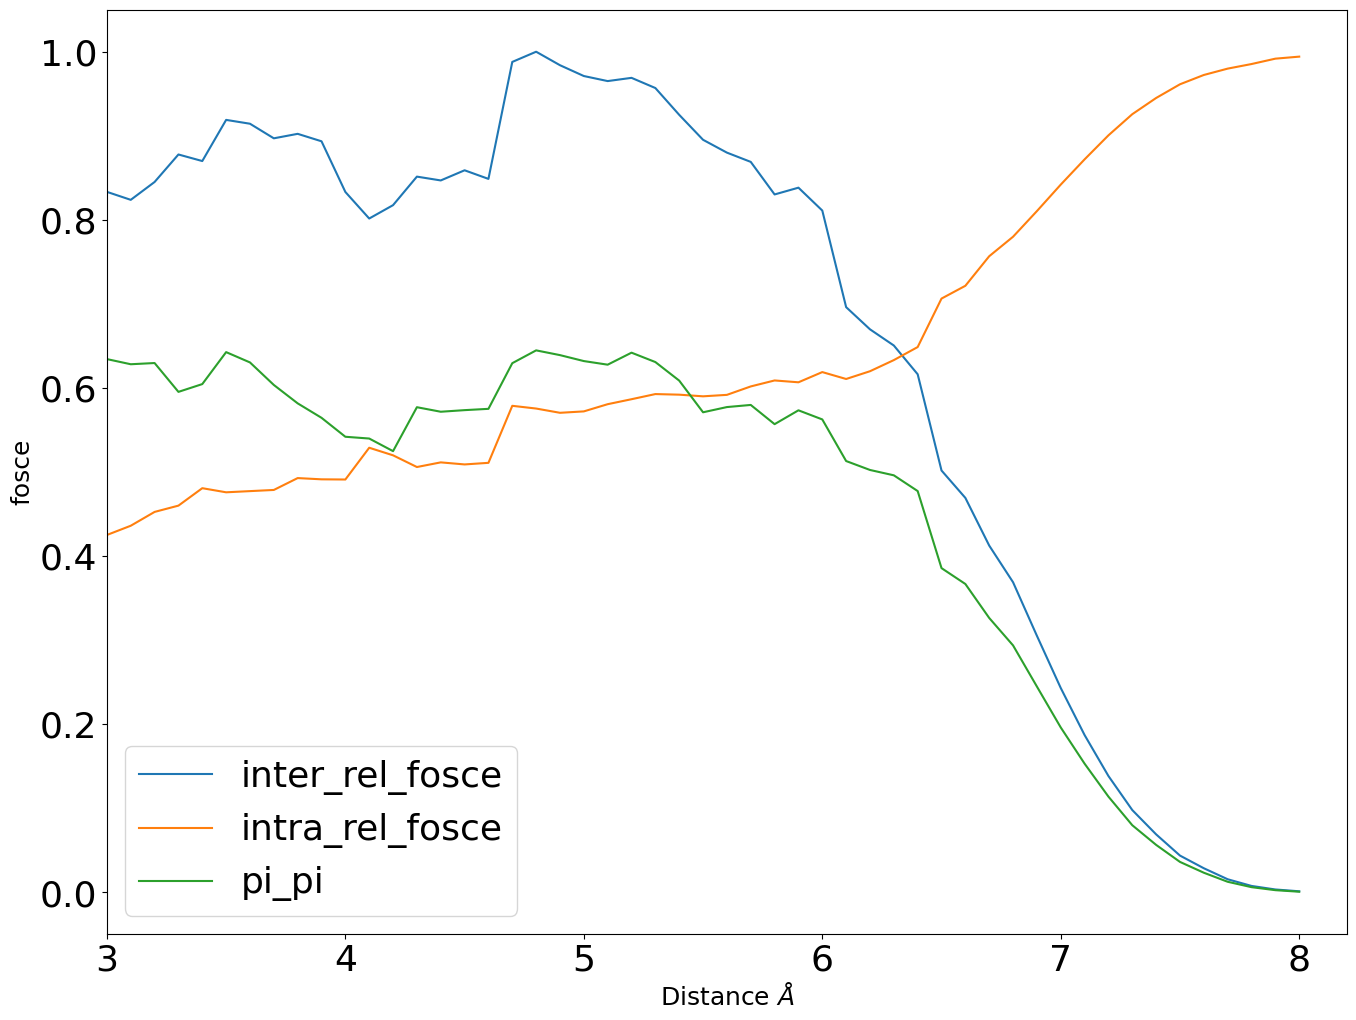

In [55]:
ax = dfftotal_fosce.loc[5:55,:].plot(x="Distance", y=["inter_rel_fosce", "intra_rel_fosce", "pi_pi"],
        kind="line", figsize=(16, 12), xlim=(3, 8.2))
ax.set_xlabel('Distance $\AA$')
ax.set_ylabel('fosce')
plt.rc('font', size=26)

plt.show()

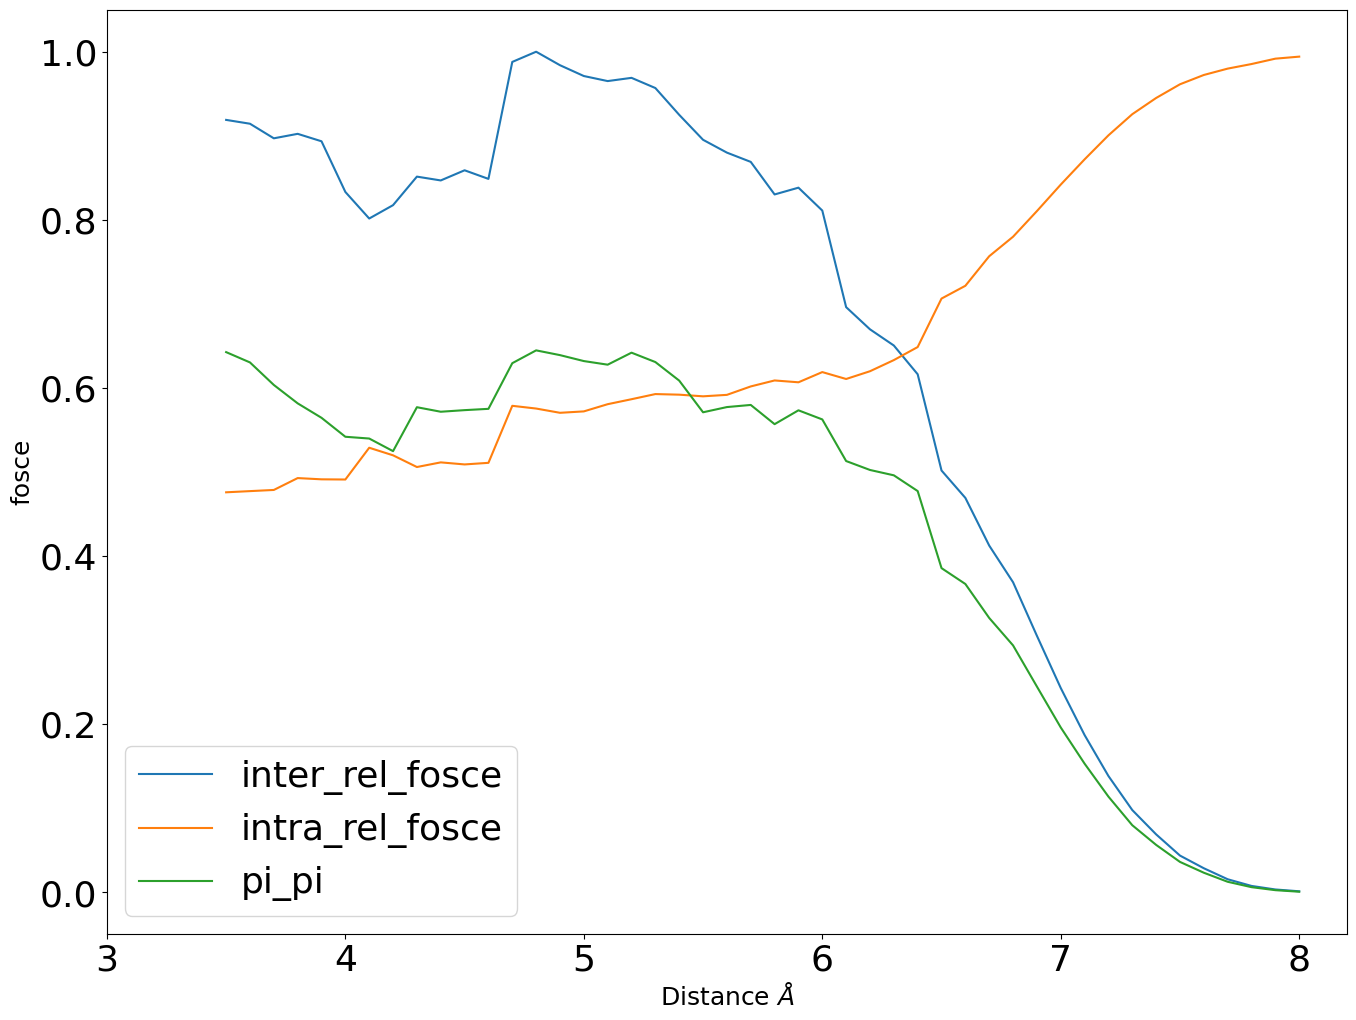

In [56]:
ax = dfftotal_fosce.loc[10:55,:].plot(x="Distance", y=["inter_rel_fosce", "intra_rel_fosce", "pi_pi"],
        kind="line", figsize=(16, 12), xlim=(3, 8.2))
ax.set_xlabel('Distance $\AA$')
ax.set_ylabel('fosce')
plt.rc('font', size=26)

plt.show()

#### That's it :)